In [301]:
import pandas as pd
import numpy as np
import random 

In [302]:
data = pd.read_csv("Housing Price data set.csv")

In [303]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [304]:
X = np.array(data)

In [305]:
X = X[:,[1,2,3]]

In [306]:
X

array([[42000.0, 5850, 3],
       [38500.0, 4000, 2],
       [49500.0, 3060, 3],
       ...,
       [103000.0, 6000, 3],
       [105000.0, 6000, 3],
       [105000.0, 6000, 3]], dtype=object)

In [307]:
random.shuffle(X)
p = 0.80*len(X)
p = round(p)

In [308]:
X_train = X[:p, :]
X_test = X[p: , : ]

Y_train = X_train[:p,0]
Y_test = X_test[p:,0]
X_train = X_train[:,[1,2]]
X_test = X_test[:,[1,2]]

In [309]:
X_train = (X_train - X_train.min(axis=0))/(X_train.max(axis=0) - X_train.min(axis=0))
Y_train = (Y_train - Y_train.min(axis=0))/(Y_train.max(axis=0) - Y_train.min(axis=0))


In [310]:
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

In [311]:
X_train

array([[1, 0.36363636363636365, 0.5],
       [1, 0.36363636363636365, 0.5],
       [1, 0.36363636363636365, 0.5],
       ...,
       [1, 0.1025974025974026, 0.25],
       [1, 0.2761904761904762, 0.25],
       [1, 0.20346320346320346, 0.5]], dtype=object)

# Stochastic Gradient Descent

In [312]:
def SGD(epochs, W, alpha):
    Totalcost = []
    for i in range(epochs):
        j = random.randint(0, len(X_train)-1)
        prediction = np.dot(X_train[j], W.T)
        error = prediction - Y_train[j]
        cost = 1/2 * np.dot(error, error)
        W = W - (alpha * np.dot(X_train[j], error))
        Totalcost.append(cost)
        
    return W, Totalcost

In [313]:
W = np.array([0,0,0])
alpha = 0.01
epochs = 80000
W, Totalcost = SGD(epochs, W, alpha)

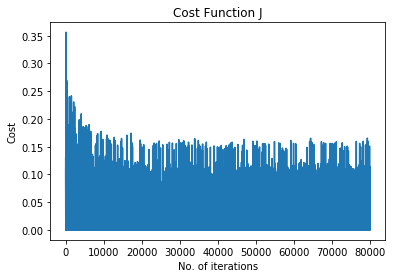

In [314]:
#Plot the cost function...
import matplotlib.pyplot as plt
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(Totalcost)
plt.show()

# Gradient descent with momentum

In [315]:
def cost_compute(X_,Y,theta):
    J = np.power((np.dot(X_, theta)-Y),2)
    return np.sum(J) / (2 * len(X_))


In [316]:
def gradient_Descent(X_,Y,theta,alpha, beta):
    v=0
    totalCost =[]
    for i in range(1000):
        prediction = np.dot(X_, theta)
        grad = 1/len(X_)*(np.dot(X_.T, prediction - Y) )
        v = beta*v + (1-beta) * grad
        theta_prev = theta
        theta = theta - alpha*v
        
        totalCost.append(cost_compute(X_, Y, theta))
        if np.sum(abs(theta_prev - theta)) < 1e-3 and i > 500:
            break
    return theta,totalCost

In [317]:
alpha = 0.01
beta = 0.9

theta = np.array([0,0,0])

theta, totalCost= gradient_Descent(X_train,Y_train,theta,alpha, beta)
finalCost = cost_compute(X_train,Y_train,theta)
#print(totalCost)
theta

array([0.15868646524702693, 0.08837486625333855, 0.11004772645252218],
      dtype=object)

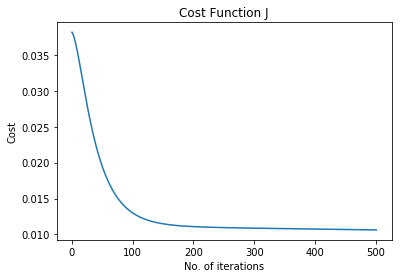

In [318]:
#Plot the cost function...
import matplotlib.pyplot as plt
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(totalCost)
plt.show()

# RMS PROP

In [319]:
def cost_compute(X_,Y,theta):
    J = np.power((np.dot(X_, theta)-Y),2)
    return np.sum(J) / (2 * len(X_))


In [320]:
def rmsgradient_Descent(X_,Y,theta,alpha, beta, ep):
    v=0
    totalCost =[]
    for i in range(200):
        prediction = np.dot(X_, theta)
        #print(prediction)
        grad = 1/len(X_)*(np.dot(X_.T, prediction - Y) )
        #print(grad.shape)
        v = beta*v + (1-beta) * np.square(grad)
        #print(v.dtype)
        v = v.astype(float)
        theta_prev = theta
        theta = theta - (alpha*grad)/ (np.sqrt(v) + ep)
        cost = cost_compute(X_, Y, theta)
        #print(cost)
        totalCost.append(cost)
        if np.sum(abs(theta_prev - theta)) < 1e-3 :
            break
    return theta,totalCost

In [321]:
alpha = 0.01
beta = 0.9
ep = 1e-8
theta = np.array([0,0,0])

theta, totalCost= rmsgradient_Descent(X_train,Y_train,theta,alpha, beta,ep)
finalCost = cost_compute(X_train,Y_train,theta)
#print(totalCost)
theta

array([-0.011547554410778059, 0.5794241705226729, 0.23932176795826016],
      dtype=object)

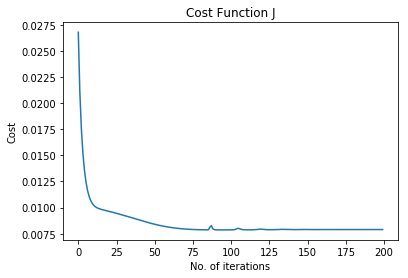

In [322]:
#Plot the cost function...
import matplotlib.pyplot as plt
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(totalCost)
plt.show()

# ADAM

In [323]:
def cost_compute(X_,Y,theta):
    J = np.power((np.dot(X_, theta)-Y),2)
    return np.sum(J) / (2 * len(X_))


In [324]:
def ADAM(X_,Y,theta,alpha, beta1, beta2, ep):
    v=0
    totalCost =[]
    m = 0
    i=0
    for i in range(200):
        prediction = np.dot(X_, theta)
        grad = 1/len(X_)*(np.dot(X_.T, prediction - Y) )
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * np.square(grad)
        m_ = m/(1 - (beta1 ** 2))
        v_ = v/(1 - (beta2 ** 2))
        v_ = v_.astype(float)
        theta_prev = theta
        theta = theta - (alpha * m_)/ (np.sqrt(v_) + epsilon)
        totalCost.append(cost_compute(X_, Y, theta))
        if np.sum(abs(theta_prev - theta)) < 1e-3 :
            print(i)
            break
        i=i+1
    return theta,totalCost

In [325]:
theta = np.array([0,0,0])
alpha = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
theta, totalCost= ADAM(X_train,Y_train,theta,alpha, beta1, beta2,ep)


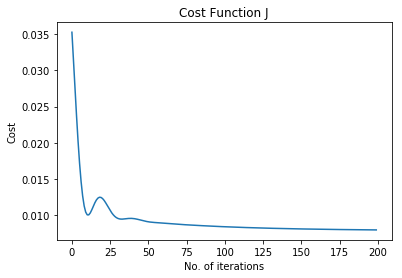

In [326]:
#Plot the cost function...
import matplotlib.pyplot as plt
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(totalCost)
plt.show()